# Smoke Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("smoke_detection_iot.csv")

In [3]:
df.head(5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
df.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62625    False
62626    False
62627    False
62628    False
62629    False
Length: 62630, dtype: bool

In [7]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0', 'UTC','CNT'],inplace=True)

In [9]:
df.columns = df.columns.str.replace(' ','_')
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [10]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [11]:
df.std()

Temperature[C]      14.359576
Humidity[%]          8.865367
TVOC[ppb]         7811.589055
eCO2[ppm]         1905.885439
Raw_H2             272.464305
Raw_Ethanol        609.513156
Pressure[hPa]        1.331344
PM1.0              922.524245
PM2.5             1976.305615
NC0.5             4265.661251
NC1.0             2214.738556
NC2.5             1083.383189
Fire_Alarm           0.451596
dtype: float64

In [12]:
df.var()

Temperature[C]    2.061974e+02
Humidity[%]       7.859473e+01
TVOC[ppb]         6.102092e+07
eCO2[ppm]         3.632399e+06
Raw_H2            7.423680e+04
Raw_Ethanol       3.715063e+05
Pressure[hPa]     1.772476e+00
PM1.0             8.510510e+05
PM2.5             3.905784e+06
NC0.5             1.819587e+07
NC1.0             4.905067e+06
NC2.5             1.173719e+06
Fire_Alarm        2.039391e-01
dtype: float64

## Exploratory Data Analysis

*1.univariate analysis*

<AxesSubplot:ylabel='Fire_Alarm'>

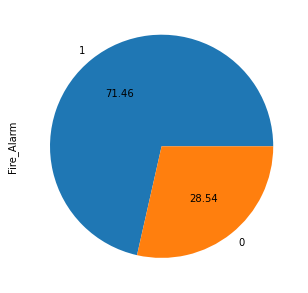

In [13]:
plt.figure(figsize=(5,8))
df['Fire_Alarm'].value_counts().plot(kind ='pie',autopct = '%.2f')

The Fire Alarm rang for about 71.46% and 28.56% it did not

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

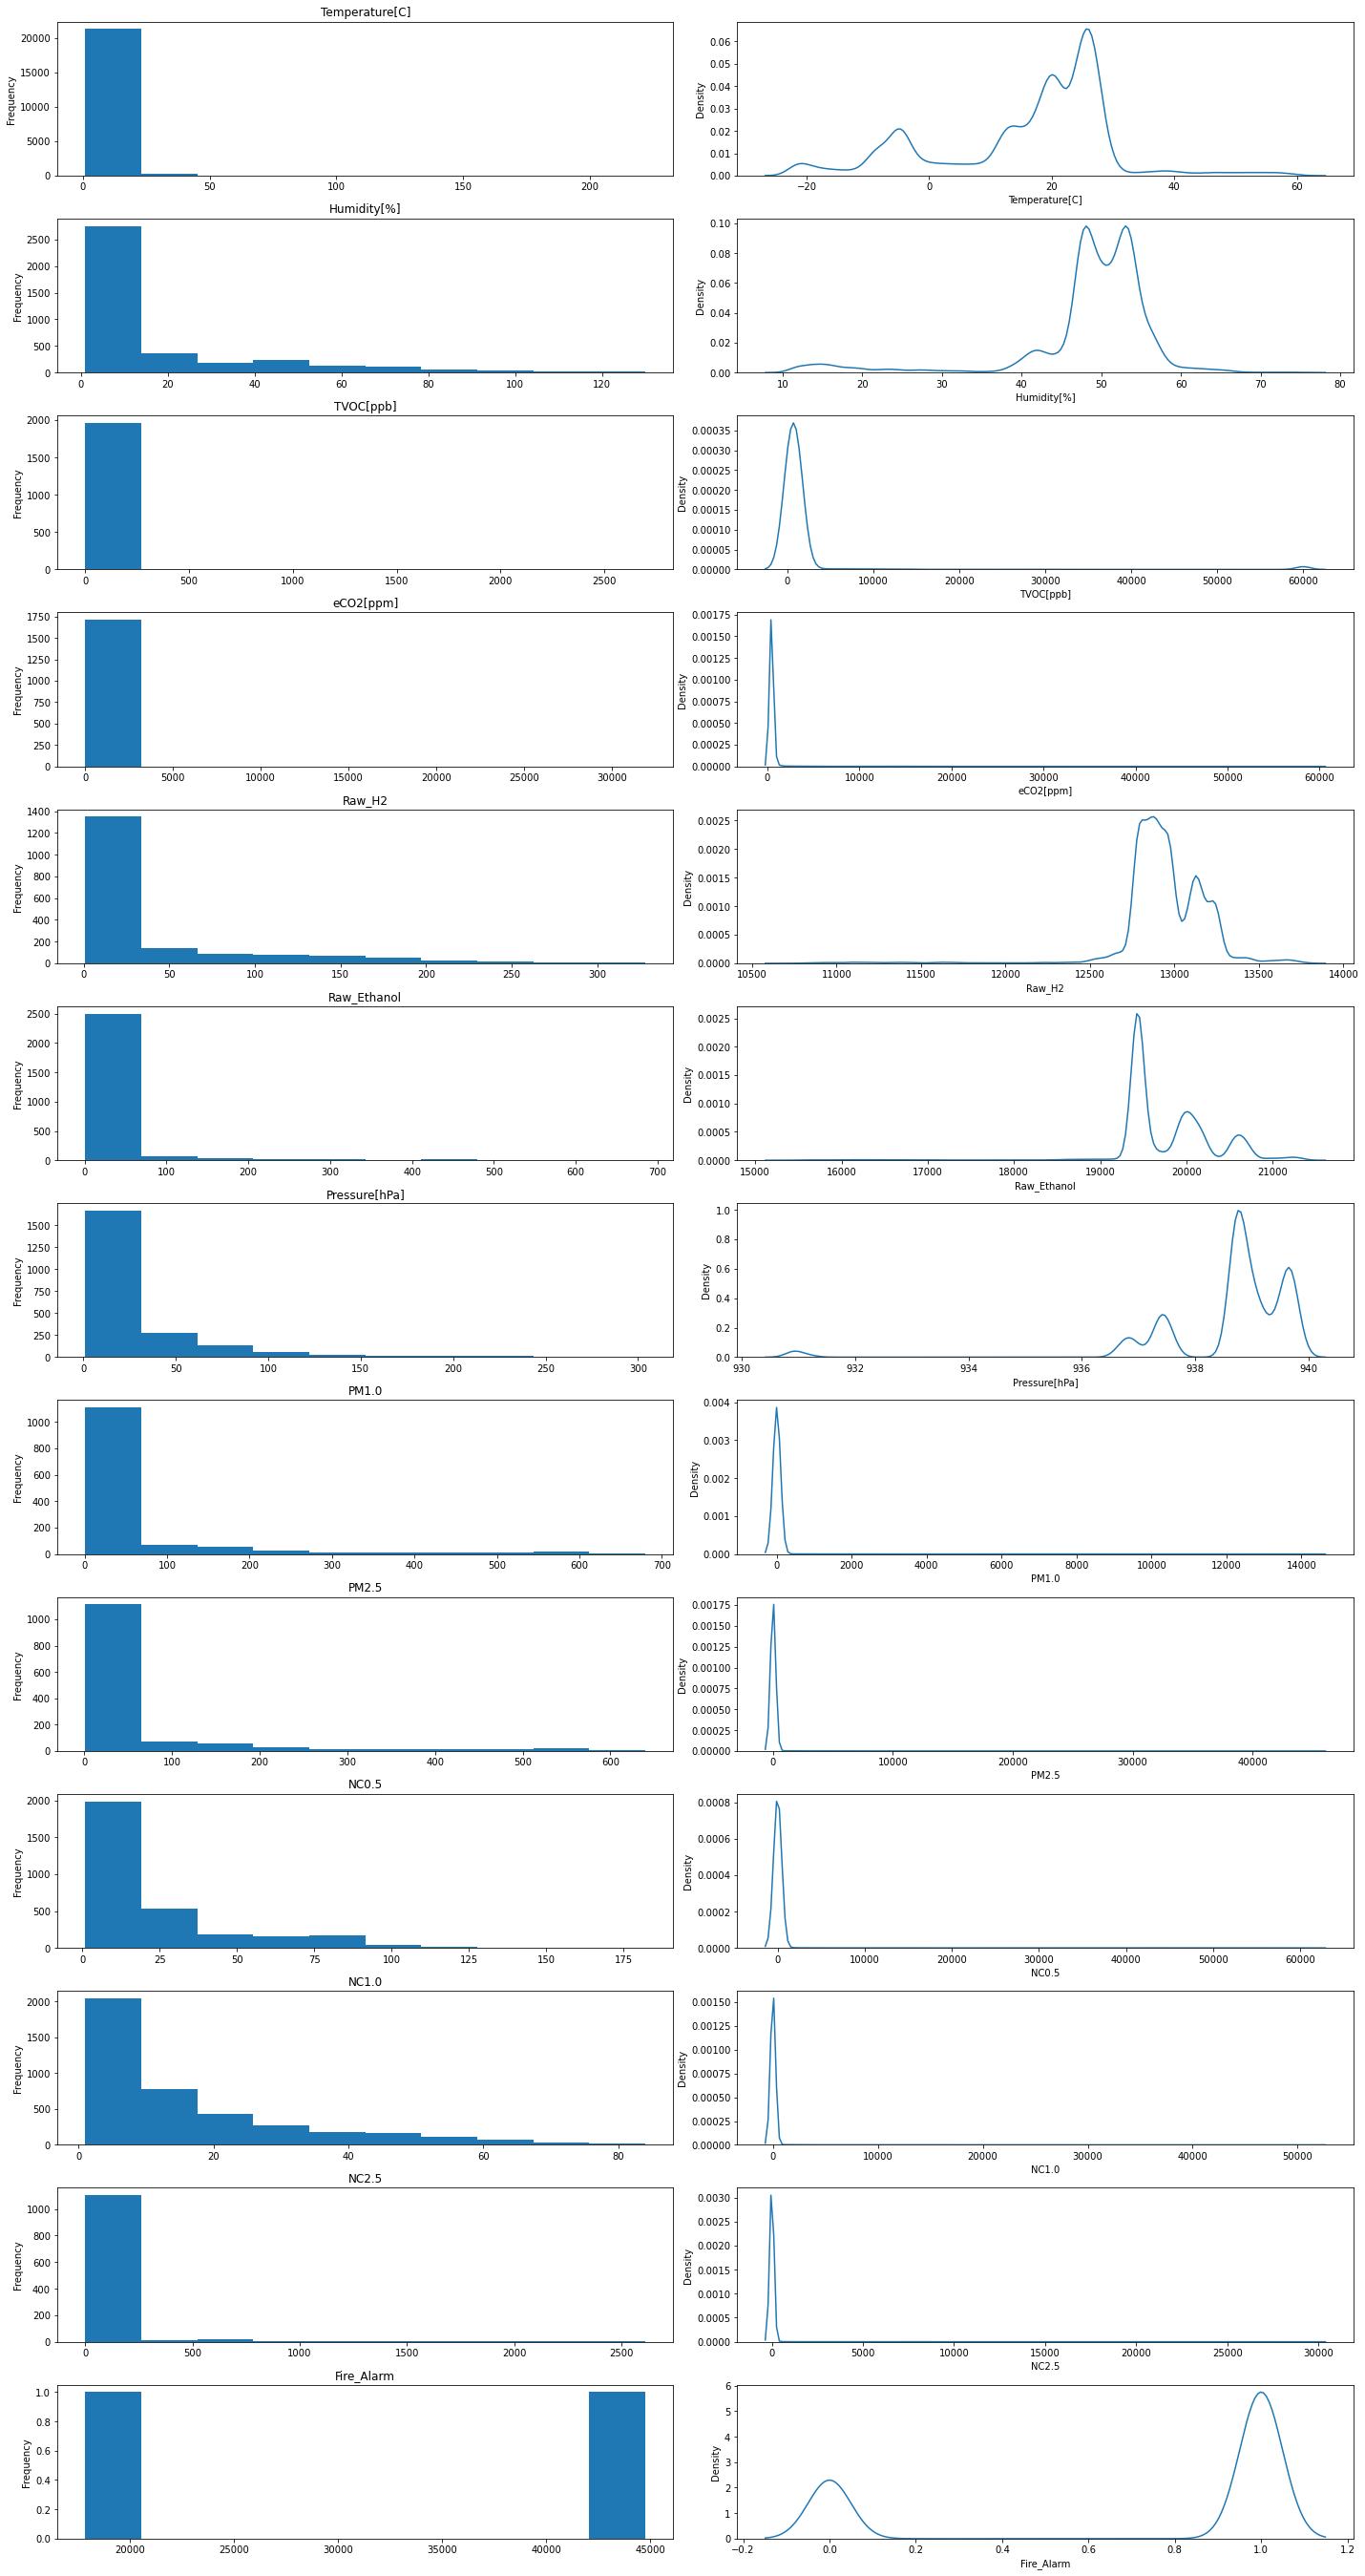

In [14]:
j =1
fig = plt.figure(figsize = (20,40))
for i in df.columns: 
    plt.subplot(14,2,j)
    df[i].value_counts().plot(kind ='hist')
    j=j+1
    plt.title(i)
    plt.subplot(14,2,j)
    sns.distplot(df[i],hist = False)
    j = j+1

plt.tight_layout()

From the above histogram and distplots it is evident that most of the fields are skewed. Since the data is skewed that 
means we have outliers in our dataset. Let's visualize that using Boxplots

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\si

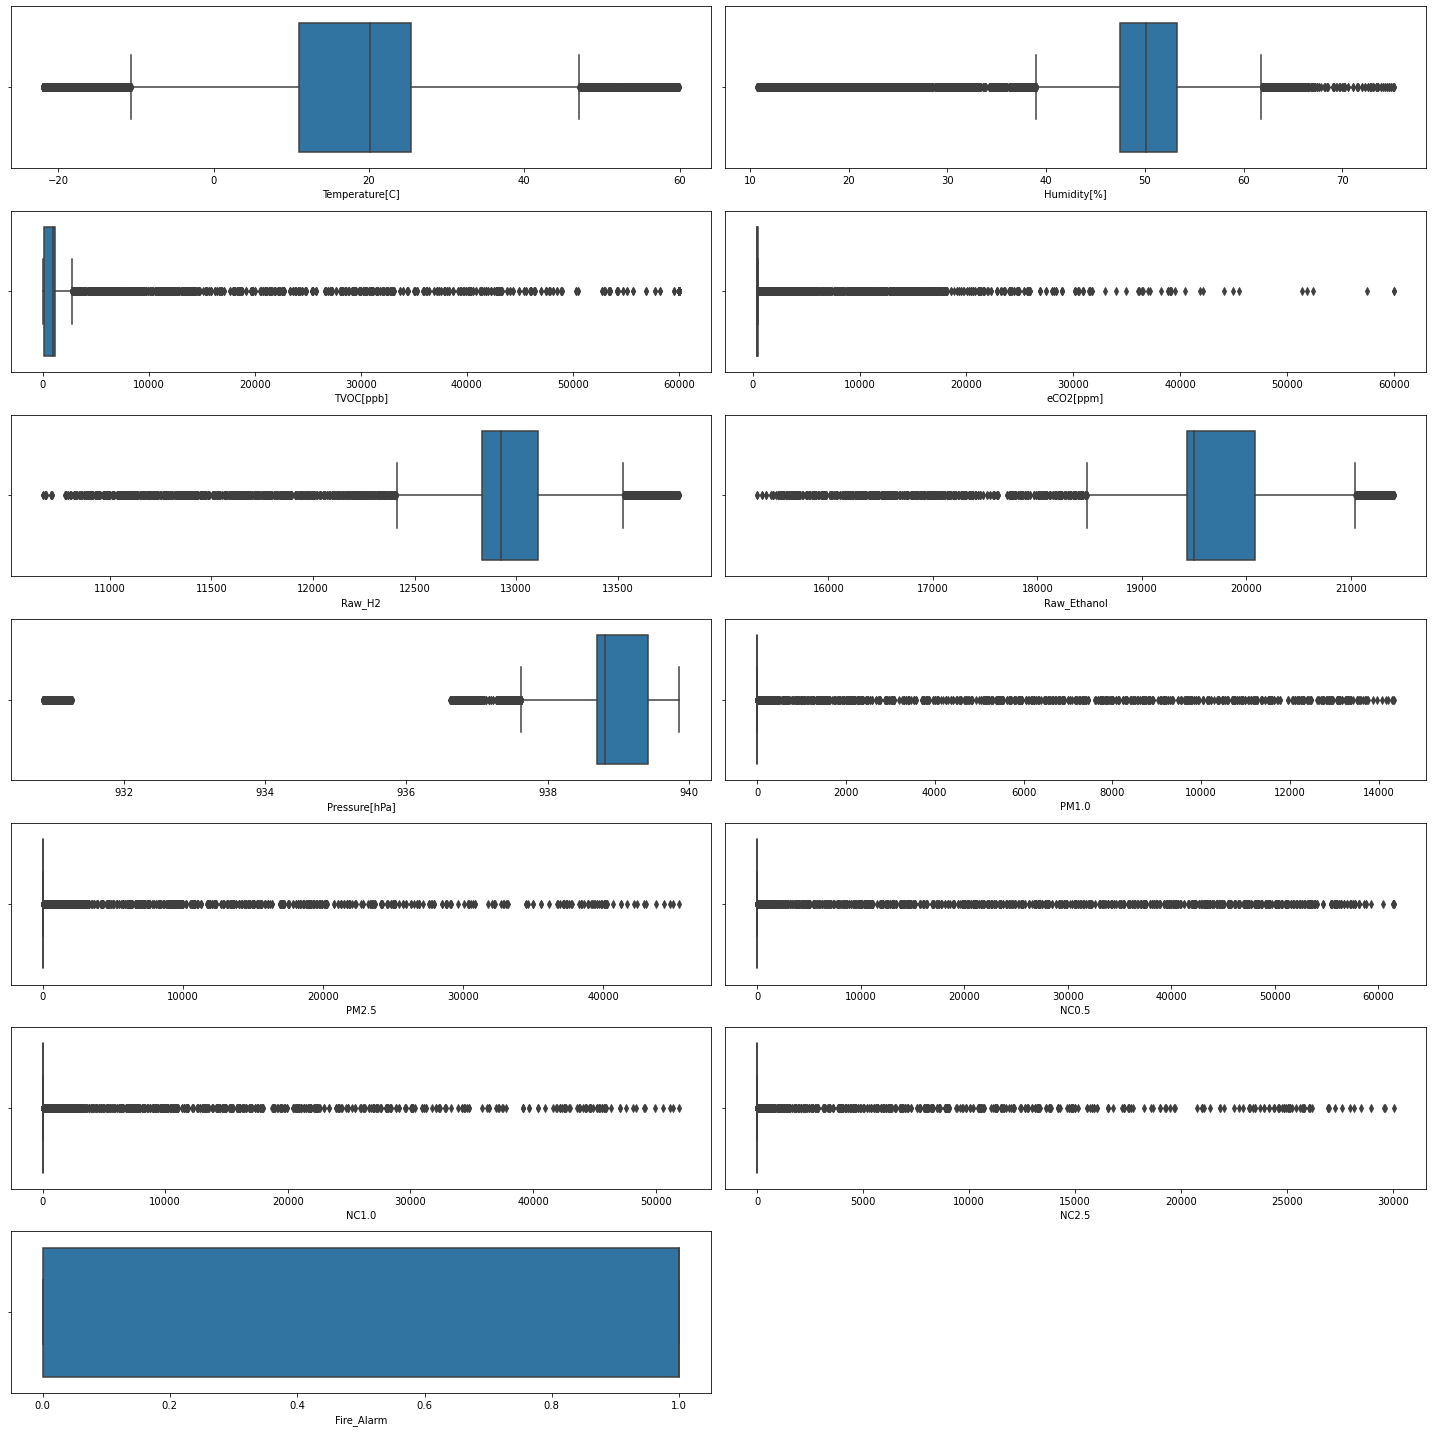

In [15]:
j =1
plt.figure(figsize = (20,20))
for i in df.columns:
    plt.subplot(7,2,j)
    sns.boxplot(df[i])
    j=j+1
plt.tight_layout()

Woah! We have a lot of Outliers

### 2.Bivariate Analysis

In [16]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw_H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw_Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


<AxesSubplot:>

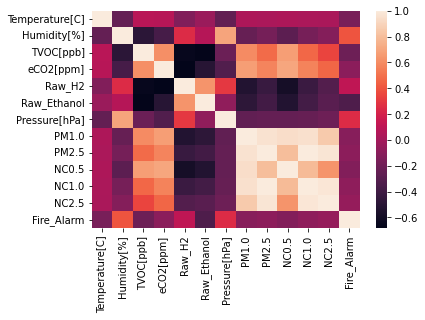

In [17]:
sns.heatmap(df.corr())

Few Obseravtions:

- Pressure and Humidity have a high correlation.<br>
- Temperature does not has a important role in detection.<br>
- Since PM's and NC's have high correlation with each other.<br>
- TVOC,PM's and NC's are principal attributes which can be used for classification as the difference is very high.<br>

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire_Alarm', ylabel='eCO2[ppm]'>

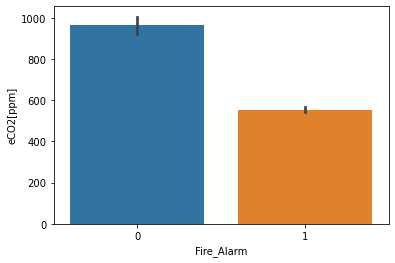

In [18]:
sns.barplot(df['Fire_Alarm'] , df['eCO2[ppm]'])

The above plot shows when co2 equivalent concentration reduces the there is a chance of triggering a fire alarm

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire_Alarm', ylabel='TVOC[ppb]'>

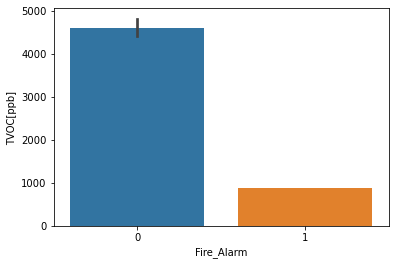

In [19]:
sns.barplot(df['Fire_Alarm'] , df['TVOC[ppb]'])

if Total Volatile Organic Compounds reduces it will trigger fire alarm 

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire_Alarm', ylabel='Humidity[%]'>

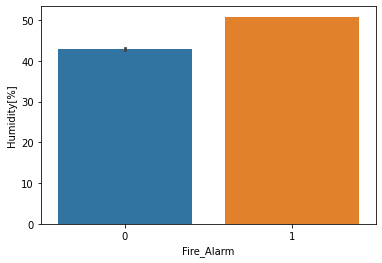

In [20]:
sns.barplot(df['Fire_Alarm'] , df['Humidity[%]'])

With a slight change(increase) in Humidity% the File Alarm will trigger.

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire_Alarm', ylabel='PM2.5'>

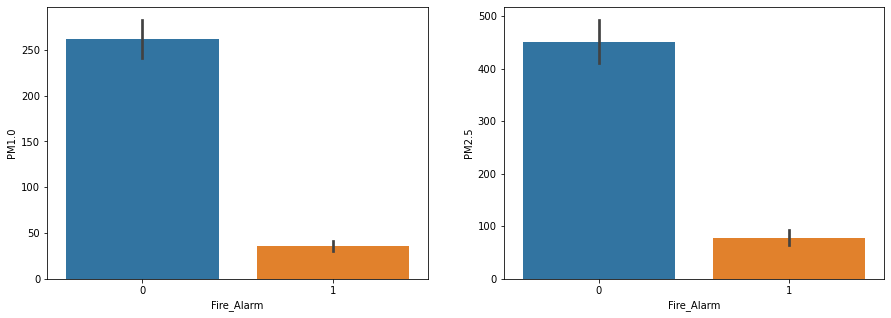

In [21]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(df['Fire_Alarm'] , df['PM1.0'])
plt.subplot(122)
sns.barplot(df['Fire_Alarm'] , df['PM2.5'])

smoke particulates are usually of very small size which triggers the smoke alarm

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


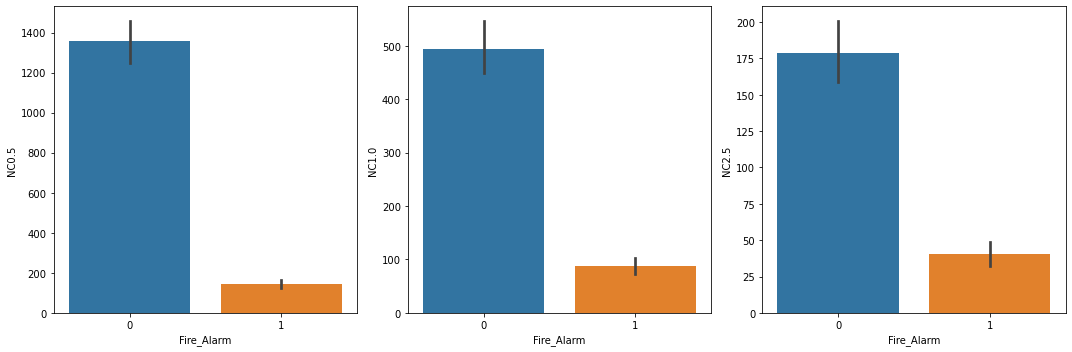

In [22]:
fig = plt.figure(figsize=(15,5))
plt.subplot(131)
sns.barplot(df['Fire_Alarm'] , df['NC0.5'])
plt.subplot(132)
sns.barplot(df['Fire_Alarm'] , df['NC1.0'])
plt.subplot(133)
sns.barplot(df['Fire_Alarm'] , df['NC2.5'])
plt.tight_layout()

Decrease in Number concentration of particulate matter will lead to trigger smoke alarm

## Data Preprocessing 

In [23]:
df_copy=df.copy()
df_copy.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [24]:
X = df_copy.drop(["Fire_Alarm"],axis=1)
y = df_copy["Fire_Alarm"]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1234)

In [27]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((43841, 12), (18789, 12), (43841,), (18789,))

For training we have 43841 data points and for testing we have 18789

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.34174653, -0.25604348, -0.23460747, ..., -0.11181998,
        -0.08953484, -0.07235955],
       [ 0.17218283,  0.36007616, -0.08985324, ..., -0.11069879,
        -0.08920524, -0.07234483],
       [ 0.60207832,  0.51692713, -0.09955527, ..., -0.11010099,
        -0.08902888, -0.07233656],
       ...,
       [ 0.76704793, -0.07775245, -0.09657998, ..., -0.11110934,
        -0.08932583, -0.07235035],
       [-1.51155129,  0.5710915 , -0.07303639, ..., -0.11078042,
        -0.08922927, -0.07234575],
       [-0.28889678, -0.14207263, -0.11145642, ..., -0.10968565,
        -0.08890692, -0.07233104]])

In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_predict=log.predict(X_test)
y_predict

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
accuracy_score(y_test,y_predict)*100

88.45601149608814

In [31]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()
# model.fit(X_train,y_train)
# y_predict = model.predict(X_test)
# y_predict


In [32]:
# accuracy_score(y_test,y_predict)*100

In [33]:
# from sklearn.linear_model import LogisticRegression,SGDClassifier
# model = SGDClassifier()
# model.fit(X_train,y_train)
# y_predict = model.predict(X_test)
# y_predict

In [34]:
# accuracy_score(y_test,y_predict)*100

In [35]:
# from sklearn.ensemble import RandomForestClassifier
# Rmodel = RandomForestClassifier()
# Rmodel.fit(X_train,y_train)
# y_predict = Rmodel.predict(X_test)
# y_predict

In [36]:
#accuracy_score(y_test,y_predict)*100

In [37]:
import pickle
pickle.dump(log, open('smoke_detection.pkl', 'wb'))

In [38]:
import pickle

def sm_detection(features):
    
    pickled_model = pickle.load(open('smoke_detection.pkl', 'rb'))
    smoke = str(round(list(pickled_model.predict([features]))[0]))
    
    return str("smoke detection "  + smoke)

In [41]:
import random
test_features  = list(X_test.iloc[random.randint(0,300),:])

In [42]:
sm_detection(test_features)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'smoke detection 1'